In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("ggplot")

# Part A

In [3]:
try:
  data = pd.read_csv("StudentsPerformance.csv")
  print("Loaded")
except:
  print("Error")

Loaded


In [4]:
data

,gender,ethnicity,education,lunch,pre-course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Exercise 1

In [5]:
data.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exercise 2

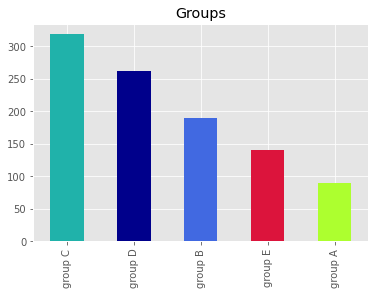

In [6]:
data["ethnicity"].value_counts().plot(kind="bar",color=["lightseagreen","darkblue","royalblue","crimson","greenyellow"]
                                      ,title="Groups")
plt.show()

### Exercise 3

In [7]:
print(data["education"].str.endswith("high school").value_counts(normalize=True).values[1]*100,"%")

37.5 %


### Exercise 4

In [8]:
data.isna().sum()

gender        0
ethnicity     0
education     0
lunch         0
pre-course    0
math          0
reading       0
writing       0
dtype: int64

הפונקציה בפנדס שבה השתמשנו בודקת ערכים חסרים, וכאשר מחברים אותה עם סכימה של אותם איברים חסרים, נקבל את כמות האיברים החסרים בכל עמודה, במקרה שלנו אין ערך חסר בכל הקובץ

### Exercise 5

In [9]:
df = pd.get_dummies(data,columns=["gender"])
df

,ethnicity,education,lunch,pre-course,math,reading,writing,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,1,0
996,group C,high school,free/reduced,none,62,55,55,0,1
997,group C,high school,free/reduced,completed,59,71,65,1,0
998,group D,some college,standard,completed,68,78,77,1,0


### Exercise 6

In [10]:
df["gender_female"].sum()

518

In [11]:
df["gender_male"].sum()

482

### Exercise 7

In [12]:
df.rename(columns={"race/ethnicity":"ethnicity"},inplace=True)
df

,ethnicity,education,lunch,pre-course,math,reading,writing,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,1,0
996,group C,high school,free/reduced,none,62,55,55,0,1
997,group C,high school,free/reduced,completed,59,71,65,1,0
998,group D,some college,standard,completed,68,78,77,1,0


### Exercise 8

In [13]:
def get_last_char(str):
    return str[-1]

### Exercise 9

In [14]:
df["ethnicity"] = df["ethnicity"].apply(get_last_char)
df

,ethnicity,education,lunch,pre-course,math,reading,writing,gender_female,gender_male
0,B,bachelor's degree,standard,none,72,72,74,1,0
1,C,some college,standard,completed,69,90,88,1,0
2,B,master's degree,standard,none,90,95,93,1,0
3,A,associate's degree,free/reduced,none,47,57,44,0,1
4,C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,E,master's degree,standard,completed,88,99,95,1,0
996,C,high school,free/reduced,none,62,55,55,0,1
997,C,high school,free/reduced,completed,59,71,65,1,0
998,D,some college,standard,completed,68,78,77,1,0


### Exercise 10

In [15]:
df["pre-course"] = df["pre-course"].apply(lambda x: 1 if x=="completed" else 0)
df

,ethnicity,education,lunch,pre-course,math,reading,writing,gender_female,gender_male
0,B,bachelor's degree,standard,0,72,72,74,1,0
1,C,some college,standard,1,69,90,88,1,0
2,B,master's degree,standard,0,90,95,93,1,0
3,A,associate's degree,free/reduced,0,47,57,44,0,1
4,C,some college,standard,0,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,E,master's degree,standard,1,88,99,95,1,0
996,C,high school,free/reduced,0,62,55,55,0,1
997,C,high school,free/reduced,1,59,71,65,1,0
998,D,some college,standard,1,68,78,77,1,0


### Exercise 11

In [16]:
df2 = pd.get_dummies(df,columns=["lunch"])
df2

,ethnicity,education,pre-course,math,reading,writing,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,B,bachelor's degree,0,72,72,74,1,0,0,1
1,C,some college,1,69,90,88,1,0,0,1
2,B,master's degree,0,90,95,93,1,0,0,1
3,A,associate's degree,0,47,57,44,0,1,1,0
4,C,some college,0,76,78,75,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,E,master's degree,1,88,99,95,1,0,0,1
996,C,high school,0,62,55,55,0,1,1,0
997,C,high school,1,59,71,65,1,0,1,0
998,D,some college,1,68,78,77,1,0,0,1


### Exercise 12

##### Section A + B + C

In [17]:
df2.replace(to_replace=["master's degree","bachelor's degree","some college","associate's degree","high school",
                         "some high school"],
            value=["higher education","higher education","higher education","degree","high school","high school"],inplace=True)
df2

,ethnicity,education,pre-course,math,reading,writing,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,B,higher education,0,72,72,74,1,0,0,1
1,C,higher education,1,69,90,88,1,0,0,1
2,B,higher education,0,90,95,93,1,0,0,1
3,A,degree,0,47,57,44,0,1,1,0
4,C,higher education,0,76,78,75,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,E,higher education,1,88,99,95,1,0,0,1
996,C,high school,0,62,55,55,0,1,1,0
997,C,high school,1,59,71,65,1,0,1,0
998,D,higher education,1,68,78,77,1,0,0,1


### Exercise 13

In [18]:
dict = {"A":1,"B":2,"C":3,"D":4,"E":5}
df2["ethnicity"] = df2["ethnicity"].apply(lambda x: dict[x])
df2

,ethnicity,education,pre-course,math,reading,writing,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,2,higher education,0,72,72,74,1,0,0,1
1,3,higher education,1,69,90,88,1,0,0,1
2,2,higher education,0,90,95,93,1,0,0,1
3,1,degree,0,47,57,44,0,1,1,0
4,3,higher education,0,76,78,75,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,5,higher education,1,88,99,95,1,0,0,1
996,3,high school,0,62,55,55,0,1,1,0
997,3,high school,1,59,71,65,1,0,1,0
998,4,higher education,1,68,78,77,1,0,0,1


# Part B

### Exercise 1

In [19]:
def normalize(col):
    m = col.mean()
    s = col.std()
    return (col - m)/s

In [20]:
df2[["math","reading","writing"]] = df2[["math","reading","writing"]].apply(lambda x: normalize(x))
df2

,ethnicity,education,pre-course,math,reading,writing,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,2,higher education,0,0.389828,0.193902,0.391296,1,0,0,1
1,3,higher education,1,0.191979,1.426762,1.312612,1,0,0,1
2,2,higher education,0,1.576922,1.769223,1.641653,1,0,0,1
3,1,degree,0,-1.258913,-0.833482,-1.582952,0,1,1,0
4,3,higher education,0,0.653627,0.604855,0.457104,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,5,higher education,1,1.445023,2.043192,1.773270,1,0,0,1
996,3,high school,0,-0.269668,-0.970467,-0.859061,0,1,1,0
997,3,high school,1,-0.467517,0.125409,-0.200978,1,0,1,0
998,4,higher education,1,0.126030,0.604855,0.588721,1,0,0,1


### Exercise 2

In [21]:
print("The group where most students completed pre-course before graduation is",
      df2.groupby("ethnicity")["pre-course"].sum().sort_values().tail(1).index[0])

The group where most students completed pre-course before graduation is 3


### Exercise 3

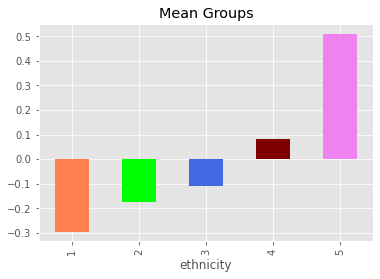

In [23]:
df2.groupby("ethnicity")["math"].mean().plot(kind="bar",color=["coral","lime","royalblue","maroon","violet"]
                                             ,title="Mean Groups")
plt.show()

### Exercise 4

array([[<AxesSubplot:title={'center':'math'}>,
        <AxesSubplot:title={'center':'reading'}>],
       [<AxesSubplot:title={'center':'writing'}>, <AxesSubplot:>]],
      dtype=object)

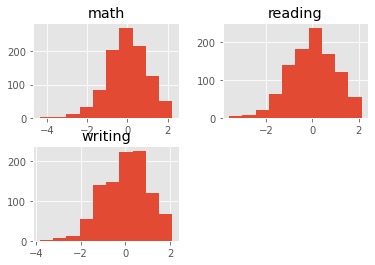

In [24]:
df_norm = df2[["math","reading","writing"]].copy()
df_norm.hist()

התפלגות הציונים לאחר הנירמול

### Exercise 5

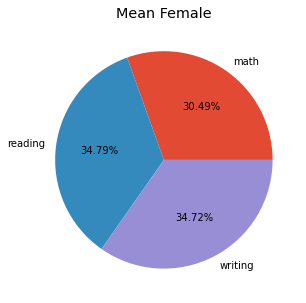

In [25]:
mean_female = df.groupby("gender_female")[["math","reading","writing"]].mean().values[1]
labels = ("math","reading","writing")
explode = (0,0,0)
plt.figure(figsize=(5,5))
plt.pie(mean_female,explode=explode,labels=labels,autopct="%1.2f%%")
plt.title("Mean Female")
plt.show()

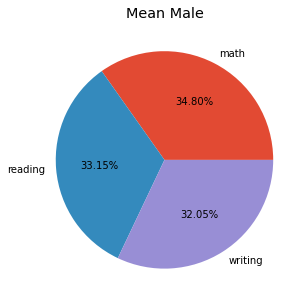

In [26]:
mean_male = df.groupby("gender_male")[["math","reading","writing"]].mean().values[1]
l = ("math","reading","writing")
e = (0,0,0)
plt.figure(figsize=(5,5))
plt.pie(mean_male,explode=e,labels=l,autopct="%1.2f%%")
plt.title("Mean Male")
plt.show()

# Part C

### Exercise 1

In [27]:
def distance(lst1,lst2):
    arr1 = np.array(lst1)
    arr2 = np.array(lst2)
    return (((arr1-arr2)**2).sum())**0.5

### Exercise 2

In [28]:
id = np.random.choice(np.arange(100000,999999),size=100,replace=False)
item = np.random.choice(["A","B","C","D","E"], size=100)
df3 = pd.DataFrame({"id":id,"item":item})
df3

,id,item
0,289244,D
1,981901,A
2,859776,C
3,545732,D
4,533110,D
...,...,...
95,551409,D
96,780734,A
97,762991,A
98,125428,E


In [29]:
df3["item"].value_counts()

B    25
C    21
D    20
E    19
A    15
Name: item, dtype: int64

### Exercise 3

In [30]:
df3 = pd.get_dummies(df3)
df3

,id,item_A,item_B,item_C,item_D,item_E
0,289244,0,0,0,1,0
1,981901,1,0,0,0,0
2,859776,0,0,1,0,0
3,545732,0,0,0,1,0
4,533110,0,0,0,1,0
...,...,...,...,...,...,...
95,551409,0,0,0,1,0
96,780734,1,0,0,0,0
97,762991,1,0,0,0,0
98,125428,0,0,0,0,1


### Exercise 4

In [31]:
y = [0,1,0,0,0]
df3["distance"] = df3.apply(lambda x: distance(x[1:],y),axis=1)
df3

,id,item_A,item_B,item_C,item_D,item_E,distance
0,289244,0,0,0,1,0,1.414214
1,981901,1,0,0,0,0,1.414214
2,859776,0,0,1,0,0,1.414214
3,545732,0,0,0,1,0,1.414214
4,533110,0,0,0,1,0,1.414214
...,...,...,...,...,...,...,...
95,551409,0,0,0,1,0,1.414214
96,780734,1,0,0,0,0,1.414214
97,762991,1,0,0,0,0,1.414214
98,125428,0,0,0,0,1,1.414214


### Exercise 5

In [32]:
list(df3.groupby("distance").groups.values())[0]

Int64Index([10, 12, 14, 20, 21, 23, 28, 30, 34, 43, 45, 50, 64, 65, 67, 68, 69,
            73, 76, 79, 80, 84, 86, 87, 94],
           dtype='int64')

שהרשימות בשורות אותו דבר בדיוק כמו הרשימה שניתנה לנו

### Exercise 6

המרחק היחיד שיכול להיות אם זה לא 0 הוא $\sqrt{2}$, מכיוון שכאשר ערך האינדקסים המקבילים בשתי הרשימות לא זהה אנחנו נגיע תמיד דרך הפונקציה דיסטנס למצב של שורש $\sqrt{2}$ (1+1)